In [6]:
# Importar as libs

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [14]:
# Ler os dados

Base_Dados = pd.read_csv('unicorns till sep 2022.csv')

display(Base_Dados)

,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
...,...,...,...,...,...,...,...
1181,LeadSquared,$1,6/21/2022,India,Bengaluru,Internet software & services,"Gaja Capital Partners, Stakeboat Capital, West..."
1182,FourKites,$1,6/21/2022,United States,Chicago,"Supply chain, logistics, & delivery","Hyde Park Venture Partners, Bain Capital Ventu..."
1183,VulcanForms,$1,7/5/2022,United States,Burlington,"Supply chain, logistics, & delivery","Eclipse Ventures, D1 Capital Partners, Industr..."
1184,SingleStore,$1,7/12/2022,United States,San Francisco,Data management & analytics,"Google Ventures, Accel, Data Collective"


In [15]:
# Verificando dimensão

Base_Dados.shape

(1186, 7)

In [20]:
# Colunas

Base_Dados.columns

Index(['Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [40]:
# Renomeando colunas

Base_Dados.rename(columns= {

    'Company' : 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Investors' : 'Investidores',
}, inplace= True )

In [22]:
# Verificar o tipo da informação

Base_Dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Empresa         1186 non-null   object
 1   Valor ($)       1186 non-null   object
 2   Data de Adesão  1186 non-null   object
 3   Country         1186 non-null   object
 4   City            1186 non-null   object
 5   Setor           1186 non-null   object
 6   Investidores    1168 non-null   object
dtypes: object(7)
memory usage: 65.0+ KB


In [25]:
# comandos nulos

Base_Dados.isnull().sum()

Empresa            0
Valor ($)          0
Data de Adesão     0
Country            0
City               0
Setor              0
Investidores      18
dtype: int64

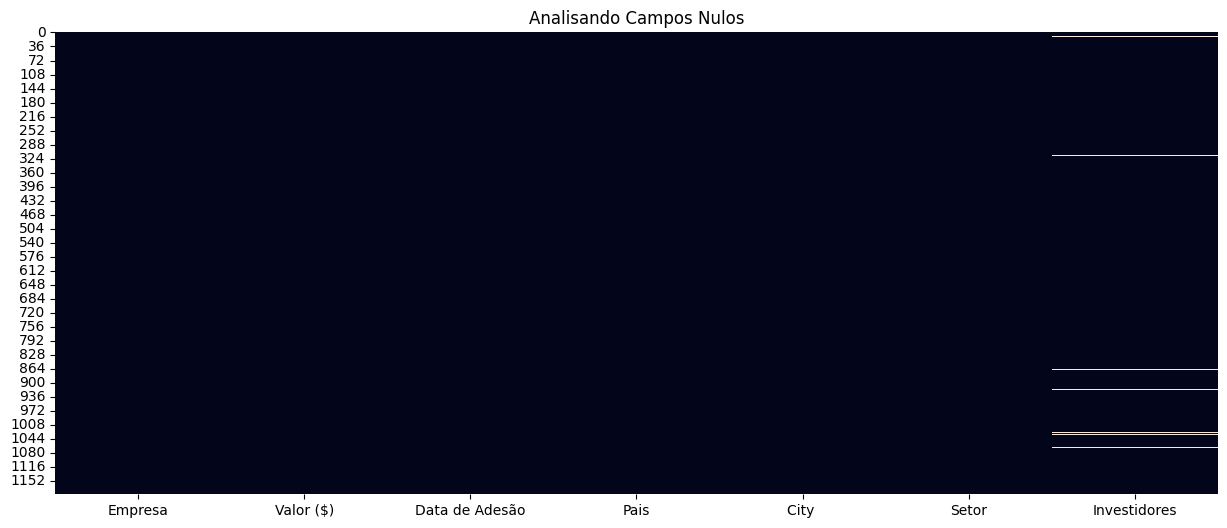

In [42]:
# Grafica 

plt.figure(figsize=(15,6))
plt.title('Analisando Campos Nulos')
sns.heatmap( Base_Dados.isnull(), cbar=False);

In [43]:
# Campos unicos

Base_Dados.nunique()

Empresa           1183
Valor ($)          222
Data de Adesão     695
Pais                48
City               286
Setor               34
Investidores      1152
dtype: int64

In [45]:
# valores unicos 

Base_Dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [48]:
# valores unicos - Rank

Base_Dados['Setor'].value_counts()

Setor
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Supply chain, logistics, & delivery                                    65
Other                                                                  65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail               

In [49]:
# valores unicos - Rank

Base_Dados['Setor'].value_counts( normalize= True)

Setor
Fintech                                                               0.201518
Internet software & services                                          0.188870
E-commerce & direct-to-consumer                                       0.086847
Health                                                                0.079258
Artificial intelligence                                               0.062395
Supply chain, logistics, & delivery                                   0.054806
Other                                                                 0.054806
Cybersecurity                                                         0.048904
Data management & analytics                                           0.037943
Auto & transportation                                                 0.033727
Hardware                                                              0.032040
Mobile & telecommunications                                           0.031197
Edtech                                        

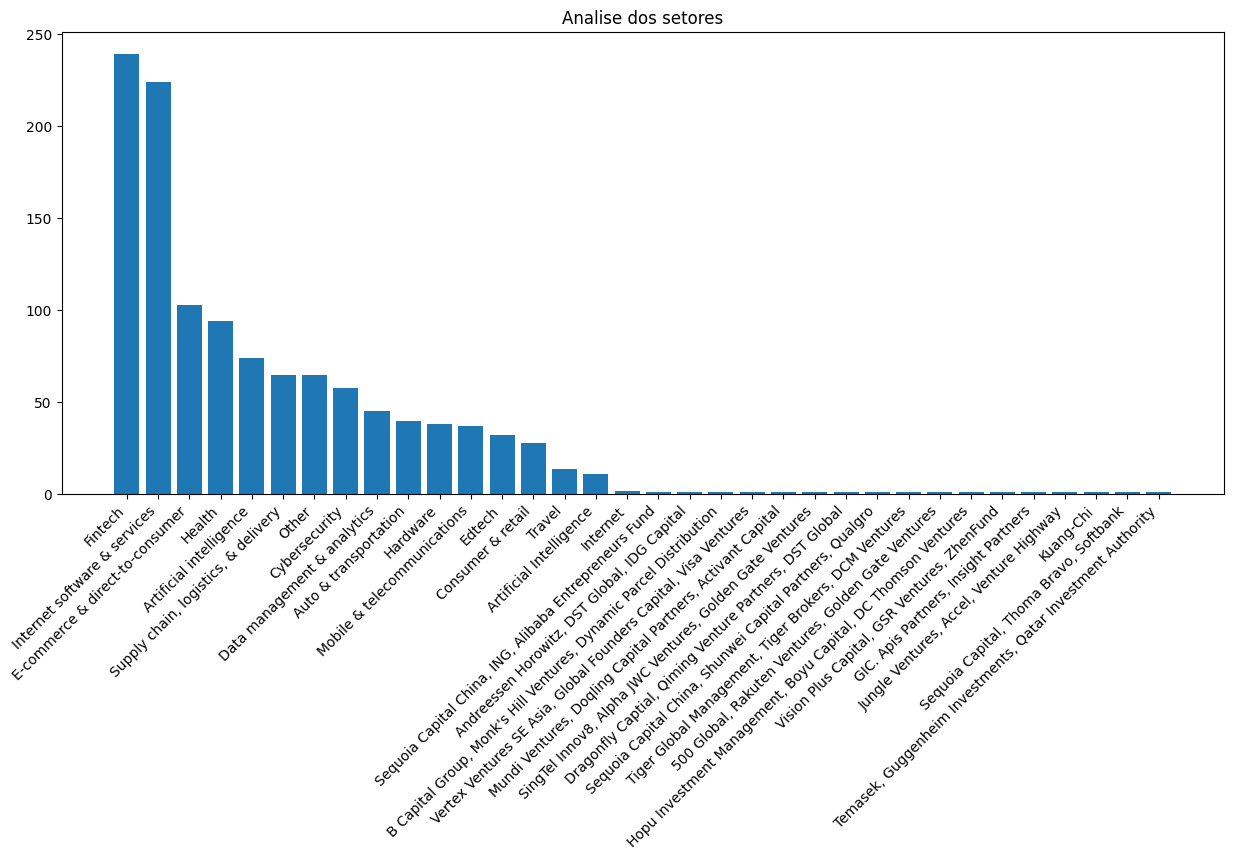

In [57]:
# Analise dos setores

plt.figure(figsize=(15,6))
plt.title('Analise dos setores')
plt.bar(Base_Dados['Setor'].value_counts().index,Base_Dados['Setor'].value_counts())
plt.xticks(rotation=45, ha='right');

In [68]:
Analise = round( Base_Dados['Pais'].value_counts(normalize= True) * 100, 1)

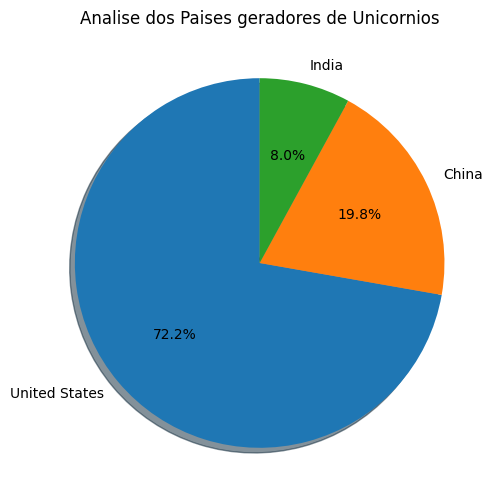

In [80]:
# Plot geral dos paises

plt.figure(figsize=(15,6))
plt.title('Analise dos Paises geradores de Unicornios - Top 3')
plt.pie(
    Analise.head(3), 
    labels = Analise.index[0:3],
    shadow = True,
    startangle = 90,
    autopct = '%1.1f%%'
);

In [84]:
# Conversão para data

Base_Dados['Data de Adesão'] = pd.to_datetime(Base_Dados['Data de Adesão'])

Base_Dados['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [86]:
# Extrair Ano e mês

Base_Dados['Mes'] = pd.DatetimeIndex( Base_Dados['Data de Adesão']).month
Base_Dados['Ano'] = pd.DatetimeIndex( Base_Dados['Data de Adesão']).year

Base_Dados.head()

,Empresa,Valor ($),Data de Adesão,Pais,City,Setor,Investidores,Mes,Ano
0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [100]:
# Tabela analitica

Analise_Agrupada = Base_Dados.groupby( by=['Pais', 'Ano', 'Mes']).count()['Empresa'].reset_index()
Analise_Agrupada

,Pais,Ano,Mes,Empresa
0,Argentina,2021,8,1
1,Australia,2018,1,1
2,Australia,2019,3,1
3,Australia,2021,5,1
4,Australia,2021,7,2
...,...,...,...,...
436,United States,2022,6,14
437,United States,2022,7,4
438,United States,2022,8,3
439,Vietnam,2021,10,1


In [93]:
# Filetrando por país 

Analise_Agrupada.loc[
    Analise_Agrupada['Pais'] == 'Brazil' 
]

,Pais,Ano,Mes,Empresa
14,Brazil,2018,7,1
15,Brazil,2018,11,1
16,Brazil,2019,6,1
17,Brazil,2019,9,1
18,Brazil,2019,10,1
19,Brazil,2019,12,1
20,Brazil,2020,1,1
21,Brazil,2020,12,2
22,Brazil,2021,1,1
23,Brazil,2021,8,2
